In [1]:
# Importing necessary packages
import os
import cv2
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
image = "./train/angular_leaf_spot/angular_leaf_spot_train.4.jpg"

In [15]:
import PIL.Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

def imshow(img, transform):
    """helper function to show data augmentation
    :param img: path of the image
    :param transform: data augmentation technique to apply"""
    
    img = PIL.Image.open(img)
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    ax[0].set_title(f'original image {img.size}')
    ax[0].imshow(img)
    img = transform(img)
    ax[1].set_title(f'transformed image {img.size}')
    ax[1].imshow(img)

In [75]:
def clean_img(img, crop, contrast, saturation, hue):
    loader_transform = transforms.Compose([
    transforms.CenterCrop(crop),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ColorJitter(contrast=contrast),
    transforms.ColorJitter(saturation=saturation),
    transforms.ColorJitter(hue=hue)])

    imshow(img,loader_transform)



In [4]:
os.getcwd()

'c:\\Users\\prasa\\Downloads\\Emerging AI\\Leaf project AI\\train'

In [62]:
dataset = './train/'
folders = os.listdir(dataset)
folders

['angular_leaf_spot', 'bean_rust', 'healthy']

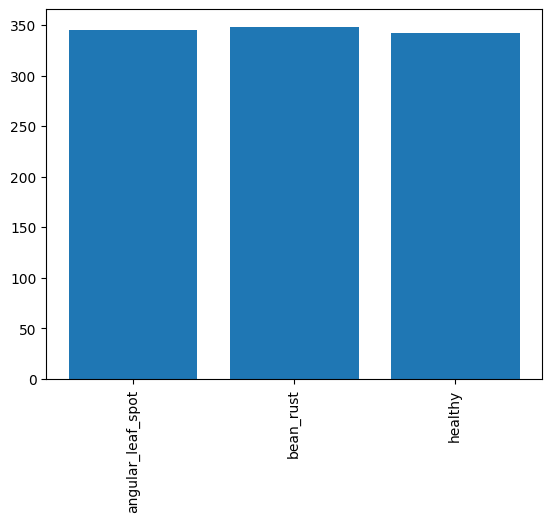

In [9]:
# Reading folders where each folder corresponds to each disease
dataset = './train/'
folders = os.listdir(dataset)
folders.sort()
# Count no.of images w.r.t each disease
img_count = {}
for folder in folders:
    cnt = len(os.listdir(dataset+folder+os.sep))
    img_count[folder] = cnt
# Plotting barplots of no.of leaf images w.r.t each disease
plt.bar(img_count.keys(), img_count.values())
plt.xticks(rotation='vertical')
plt.show()

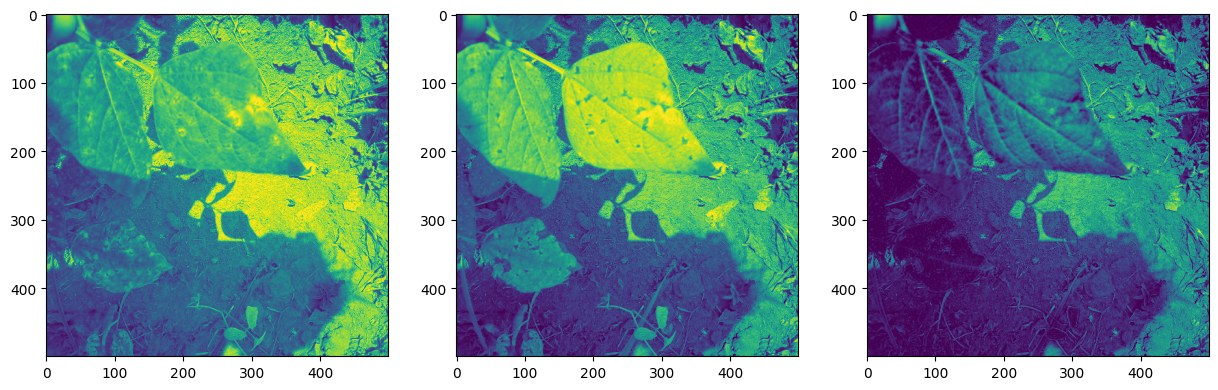

In [11]:
# Trying different color spaces to find best color channel.
image = cv2.imread('./train/angular_leaf_spot/angular_leaf_spot_train.0.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# RGB Channel
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(R)
ax[1].imshow(G)
ax[2].imshow(B)

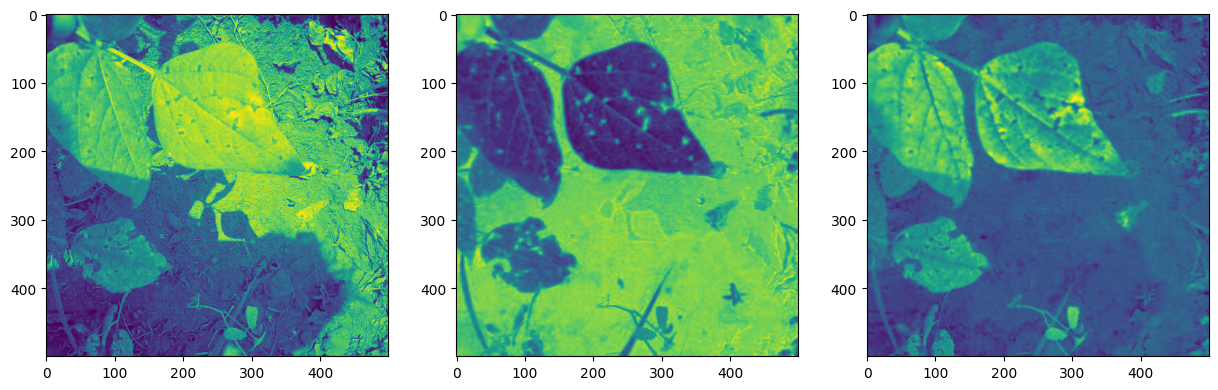

In [12]:
# Lab Color Space - https://en.wikipedia.org/wiki/CIELAB_color_space
L = img_lab[:, :, 0]
a = img_lab[:, :, 1]
b = img_lab[:, :, 2]
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(L)
ax[1].imshow(a)
ax[2].imshow(b)

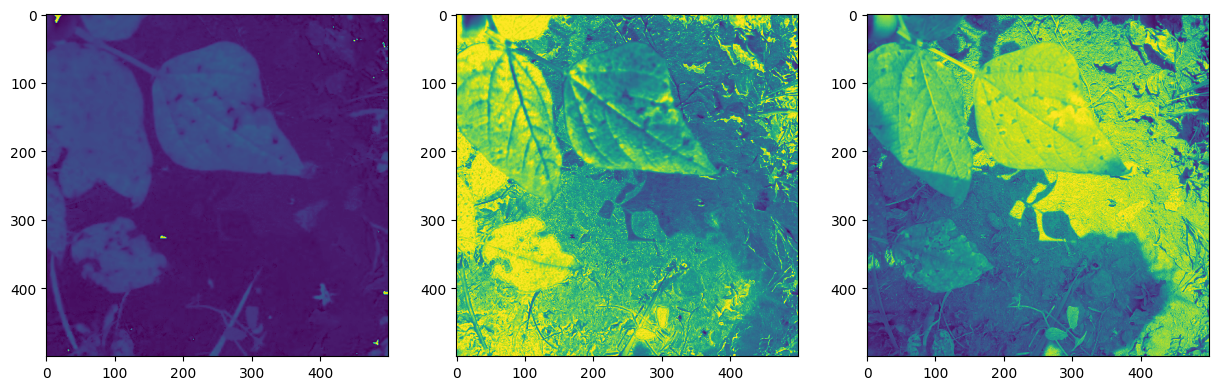

In [13]:
# HSV Color Space - https://en.wikipedia.org/wiki/HSL_and_HSV
H = img_hsv[:, :, 0]
S = img_hsv[:, :, 1]
V = img_hsv[:, :, 2]
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(H)
ax[1].imshow(S)
ax[2].imshow(V)

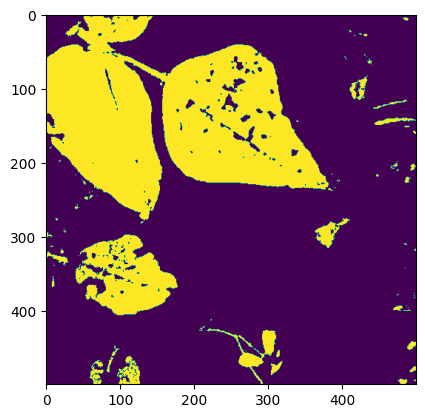

In [14]:
# K-means clustering in opencv - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
pixel_vals = b.flatten()
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Since we are interested in only actual leaf pixels, we choose 2 clusters
# one cluster for actual leaf pixels and other for unwanted background pixels.
K = 2
retval, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((b.shape))
pixel_labels = labels.reshape(img_lab.shape[0], img_lab.shape[1])
# displaying segmented image
plt.imshow(segmented_image)

Data Augmentations

Original Image

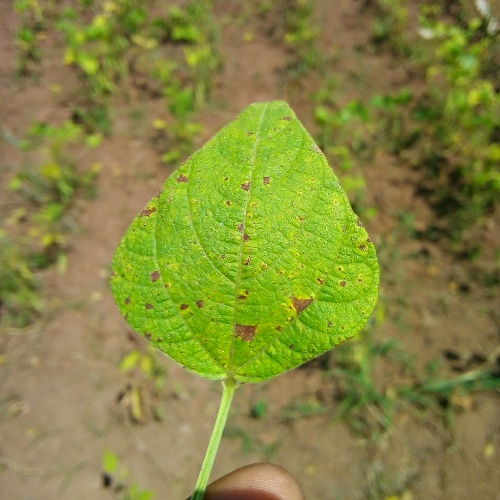

In [25]:
img = PIL.Image.open(image)
img

Cropping

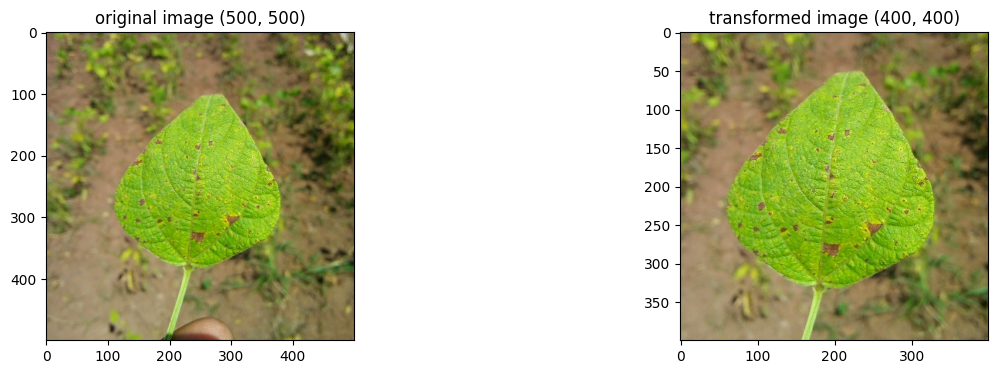

In [36]:
loader_transform = transforms.CenterCrop(400)
cropped_img = imshow(image, loader_transform)
cropped_img 

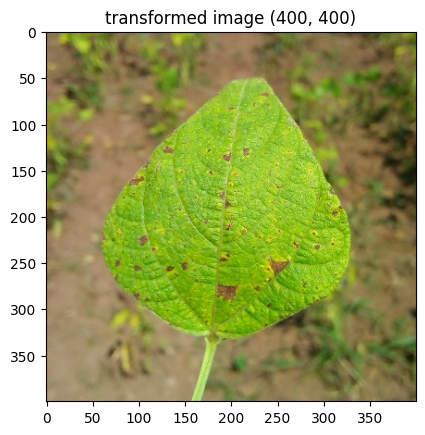

In [59]:
loader_transform = transforms.CenterCrop(400)
crop = clean_img(image, loader_transform)
crop



In [57]:
crop

Flipping

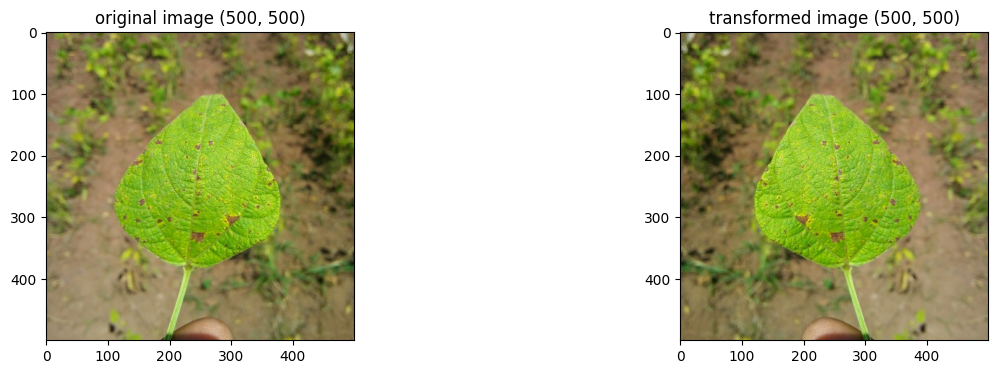

In [40]:
loader_transform = transforms.RandomHorizontalFlip(p=1)
flipped_img = imshow(image, loader_transform)
flipped_img

Pipeline for Image Augmentation

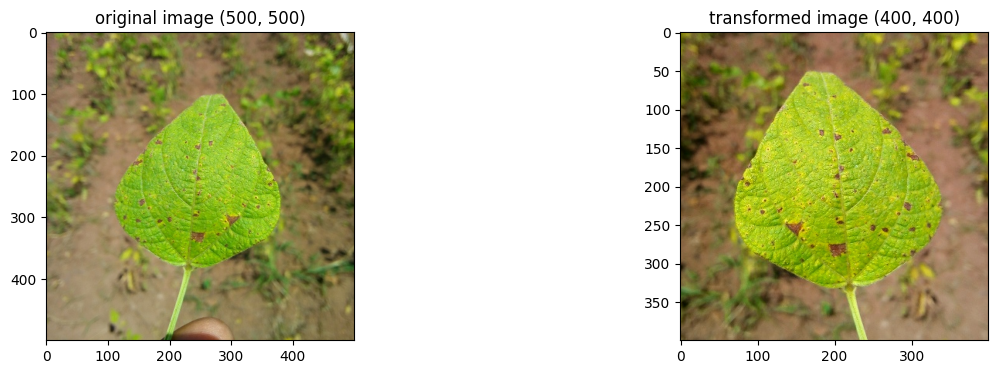

In [76]:
clean_img(image, crop=400, contrast= 0.1, saturation=0.1, hue = 0.1)